# Plot Weight Windows

In [1]:
import openmc
import numpy as np
import tokamak_radiation_environment as tre

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.ticker as ticker

[Openmc](https://docs.openmc.org/en/stable/) is able to generate its own global weight windows. However, for the case of ITER-class and ARC-class comparison we generated local weight windows with [Attila4MC](https://www.silverfirsoftware.com/Pages/Products/Attila4MC.php) in order to further accelerate the simulation and focus the attention on the most endangered region of the TF coils. Openmc is able to read the resulting weight windows (`wwinp`) file.

Here we read the `wwinp` files with openmc and plot the weight *windows lower bound* values.

In [2]:
# load weight windows
iter_ww = openmc.wwinp_to_wws("../reactors/iter_class/weight_windows.cadis.wwinp")
arc_ww = openmc.wwinp_to_wws("../reactors/arc_class/weight_windows.cadis.wwinp")

In [3]:
# Reshape arrays
iter_eb = iter_ww[0].energy_bounds
iter_lb = iter_ww[0].lower_ww_bounds[:, 12, :, -2].T

arc_eb = arc_ww[0].energy_bounds
arc_lb = arc_ww[0].lower_ww_bounds[:, 12, :, -2].T

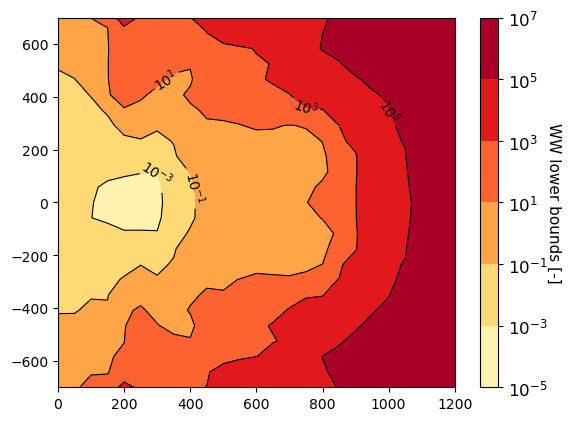

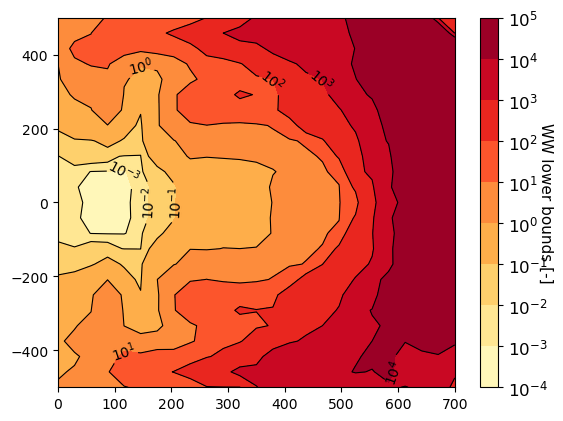

In [11]:
# Plot

# iter-class
x = np.linspace(0, 1200, 25)
z = np.linspace(-700, 700, 25)

fig, ax1 = plt.subplots()
fmt = ticker.LogFormatterSciNotation()
fmt.create_dummy_axis()
p1 = ax1.contourf(x, z, iter_lb, norm=LogNorm(), cmap='YlOrRd')
p2 = ax1.contour(x, z, iter_lb, norm=LogNorm(), colors='k', linewidths=.8)
ax1.clabel(p2, fontsize=10, colors='k', fmt=fmt)
cbar1 = fig.colorbar(p1, ax=ax1)
cbar1.ax.tick_params(labelsize=12)
cbar1.ax.yaxis.set_major_formatter(ticker.LogFormatterSciNotation())
cbar1.set_label('WW lower bounds [-]', labelpad=10, rotation=270, fontsize=11)

# arc-class
x = np.linspace(0, 700, 25)
z = np.linspace(-500, 500, 25)

fig, ax1 = plt.subplots()
fmt = ticker.LogFormatterSciNotation()
fmt.create_dummy_axis()
p1 = ax1.contourf(x, z, arc_lb, norm=LogNorm(), cmap='YlOrRd')
p2 = ax1.contour(x, z, arc_lb, norm=LogNorm(), colors='k', linewidths=.8)
ax1.clabel(p2, fontsize=10, colors='k', fmt=fmt)
cbar1 = fig.colorbar(p1, ax=ax1)
cbar1.ax.tick_params(labelsize=12)
cbar1.ax.yaxis.set_major_formatter(ticker.LogFormatterSciNotation())
cbar1.set_label('WW lower bounds [-]', labelpad=10, rotation=270, fontsize=11)